1. Вероятность того, что стрелок попадет в мишень, выстрелив один раз, равна 0.8. Стрелок выстрелил 100 раз. Найдите вероятность того, что стрелок попадет в цель ровно 85 раз.

In [14]:
from math import factorial
import numpy as np

In [15]:
# записываем сразу формулу 
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n-k)))

def binom(n, k, p): 
    binom = combinations(n, k) * (p ** k) * ((1 - p)**(n-k))
    return binom

In [16]:
# исходные параметры передаю в формулу биноминального распределения
p = 0.8
n = 100
k = 85
print('вероятность того, что стрелок попадет {} раз составляет {:.2%}'.format(n, binom(n, k, p)))

вероятность того, что стрелок попадет 100 раз составляет 4.81%


2. Вероятность того, что лампочка перегорит в течение первого дня эксплуатации, равна 0.0004. В жилом комплексе после ремонта в один день включили 5000 новых лампочек. Какова вероятность, что ни одна из них не перегорит в первый день? Какова вероятность, что перегорят ровно две?

In [17]:
p = 0.0004
n = 5000
# вероятность того, что перегорят все
p_n = p ** n
# вероятность того, что не перегорит ни одна
p_0 = 1 - p_n
# вероятность то, что перегорят 2
p_2 = p ** 2

print('вероятность того, что перегорит:\n- ни одна: {:.5%},\n- 2 лампочки: {:.5%}'.format(p_0, p_2))

вероятность того, что перегорит:
- ни одна: 100.00000%,
- 2 лампочки: 0.00002%


настолько маленькое значение $ {0.0004}^{5000} $ что python приравнял его к нулю. надеюсь, это норма.
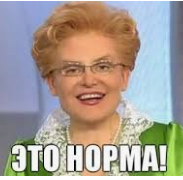

3. Монету подбросили 144 раза. Какова вероятность, что орел выпадет ровно 70 раз?

In [18]:
# применяем формулу бернулли
p = 0.5
n = 144
k = 70
print('вероятность того, что орел выпадет {} раз составляет {:.2%}'.format(n, binom(n, k, p)))

вероятность того, что орел выпадет 144 раз составляет 6.28%


4. В первом ящике находится 10 мячей, из которых 7 - белые. Во втором ящике - 11 мячей, из которых 9 белых. Из каждого ящика вытаскивают случайным образом по два мяча. Какова вероятность того, что все мячи белые? 

In [19]:
# вероятность 2 из 2х достать белый мяч из ящика 1 и 2
p_1 = combinations(7, 2) / combinations(10, 2)
p_2 = combinations(9, 2) / combinations(11, 2)
# выборка из ящиков независима, -> 
# все мячи белые это вероятность, что одновременно наступили события для p_1 и p_2
print('вероятность выбрать 2 белых из каждой коробки {:.2%}'.format(p_1*p_2))

вероятность выбрать 2 белых из каждой коробки 30.55%


тут я озадачился вопросом - а не надо ли вычесть вероятность выбрать 2 белых шара из ящиков 1 и 2, подумал, и не решился, т.к. не смог обосновать почему.

Какова вероятность того, что ровно два мяча белые? 

In [20]:
# здесь надо перебрать 3 события:
#              ящик_1     ящик 2 
# событие_1      2          0
# событие_1      0          2
# событие_1      1          1
p_1 = combinations(7,2) / combinations(10,2)
p_2 = combinations(9,2) / combinations(11,2)
p1_02 = combinations(7,0) / combinations(10,2)
p2_02 = combinations(9,2) / combinations(11,2)
p1_11 = combinations(7,1) / combinations(10,2)
p2_11 = combinations(9,1) / combinations(11,2)
p1_20 = combinations(7,2) / combinations(10,2)
p2_20 = combinations(9,0) / combinations(11,2)

P = p1_02*p2_02 + p1_11*p2_11 + p1_20*p2_20

print('вероятность достать ровно 2 белых {:.2%}'.format(P))

вероятность достать ровно 2 белых 4.85%


Какова вероятность того, что хотя бы один мяч белый?

In [21]:
# вероятность равна 1 - вероятность вытащщть все небелые мячи
p_1 = combinations(3, 2) / combinations(10, 2)
p_2 = combinations(2, 2) / combinations(11, 2)

print('вероятность хотя бы одного белого {:.2%}'.format(1 - p_1*p_2))

вероятность хотя бы одного белого 99.88%
